In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import mapdp_nw as mapdp

In [7]:
# read in data
d = pd.read_csv('toydata.csv')
N = d.shape[0]
X = d[['X_1', 'X_2']].values.T
Z = d['Z'].values

In [2]:
# Set up Normal-Wishart MAP-DP prior parameters
N0 = 0.5            # Prior count (concentration parameter)
m0 = X.mean(1)[:, None]    # Normal-Wishart prior mean
a0 = 10             # Normal-Wishart prior scale
c0 = 10/float(N)    # Normal-Wishart prior degrees of freedom
B0 = np.diag(1/(0.05*X.var(1)))  # Normal-Wishart prior precision
# # Run MAPDP to convergence
mu, z, K, E = mapdp.mapdp_nw(X, N0, m0, a0, c0, B0)

Iteration 1: K=6, E=-3921.542356, dE=inf

Iteration 2: K=6, E=-9005.635226, dE=5084.092869

Iteration 3: K=5, E=-9284.169959, dE=278.534733

Iteration 4: K=4, E=-9355.516041, dE=71.346083

Iteration 5: K=3, E=-9372.186172, dE=16.670131

Iteration 6: K=3, E=-9373.110672, dE=0.924500

Iteration 7: K=3, E=-9373.110672, dE=0.000000



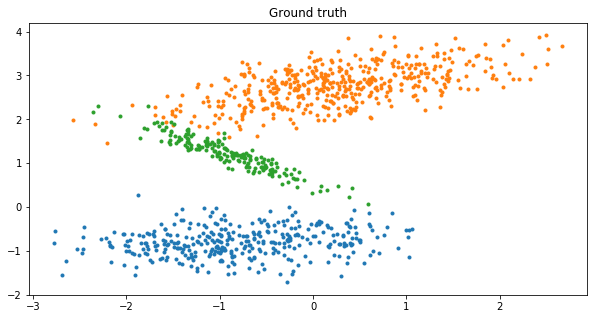

In [3]:
plt.figure(figsize=(10,5))
for j in range(1,K+1):
    i = (Z == j);
    plt.plot(X[0, i], X[1,i], '.')
plt.title('Ground truth')
plt.show()

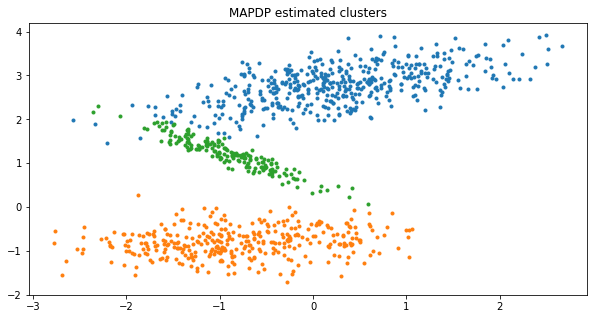

In [4]:
plt.figure(figsize=(10,5))
for j in range(K):
    i = (z == j);
    plt.plot(X[0, i], X[1,i], '.')
plt.title('MAPDP estimated clusters')
plt.show()

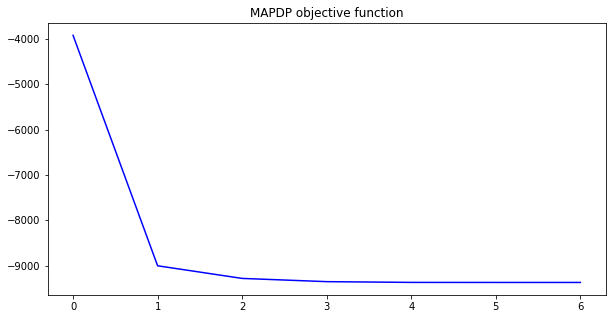

In [6]:
plt.figure(figsize=(10,5))
plt.plot(E, '-b')
plt.title('MAPDP objective function')
plt.show()